In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from sklearn.metrics import precision_score

In [ ]:
presidential_terms = [
     {'President': 'Ronald Reagan', 'Start': '1985-01-20', 'End': '1989-01-20', 'Party': 'Republican'},
     {'President': 'George Bush', 'Start': '1989-01-20', 'End': '1993-01-20', 'Party': 'Republican'},
     {'President': 'Bill Clinton', 'Start': '1993-01-20', 'End': '2001-01-20', 'Party': 'Democratic'},
     {'President': 'George W. Bush', 'Start': '2001-01-20', 'End': '2009-01-20', 'Party': 'Republican'},
     {'President': 'Brack Obama', 'Start': '2009-01-20', 'End': '2017-01-20', 'Party': 'Democratic'},
     {'President': 'Donald Trump', 'Start': '2017-01-20', 'End': '2021-01-20', 'Party': 'Republican'},
     {'President': 'Joe Biden', 'Start': '2021-01-20', 'End':'2024-01-20', 'Party': 'Democratic'},
]

df_presidents = pd.DataFrame(presidential_terms)

df_presidents['Start'] = pd.to_datetime(df_presidents['Start'])
df_presidents['End'] = pd.to_datetime(df_presidents['End'], errors='coerce')

df_presidents_sorted = df_presidents.sort_values('Start')

print(df_presidents_sorted)

        President      Start        End       Party
0   Ronald Reagan 1985-01-20 1989-01-20  Republican
1     George Bush 1989-01-20 1993-01-20  Republican
2    Bill Clinton 1993-01-20 2001-01-20  Democratic
3  George W. Bush 2001-01-20 2009-01-20  Republican
4     Brack Obama 2009-01-20 2017-01-20  Democratic
5    Donald Trump 2017-01-20 2021-01-20  Republican
6       Joe Biden 2021-01-20 2024-01-20  Democratic


In [ ]:
sp500 = yf.download('^GSPC', start='1985-01-20')
mldata=sp500

annual_returns = sp500['Adj Close'].resample('Y').last().pct_change()


presidential_terms = [
     {'President': 'Ronald Reagan', 'Start': '1985-01-20', 'End': '1989-01-20', 'Party': 'Republican'},
     {'President': 'George Bush', 'Start': '1989-01-20', 'End': '1993-01-20', 'Party': 'Republican'},
     {'President': 'Bill Clinton', 'Start': '1993-01-20', 'End': '2001-01-20', 'Party': 'Democratic'},
     {'President': 'George W. Bush', 'Start': '2001-01-20', 'End': '2009-01-20', 'Party': 'Republican'},
     {'President': 'Brack Obama', 'Start': '2009-01-20', 'End': '2017-01-20', 'Party': 'Democratic'},
     {'President': 'Donald Trump', 'Start': '2017-01-20', 'End': '2021-01-20', 'Party': 'Republican'},
     {'President': 'Joe Biden', 'Start': '2021-01-20', 'End':'2024-01-20', 'Party': 'Democratic'},
]

presidents_df = pd.DataFrame(presidential_terms)
presidents_df['Start'] = pd.to_datetime(presidents_df['Start'])
presidents_df['End'] = pd.to_datetime(presidents_df['End'])

def annotate_returns_by_president(returns, presidents):

    results = pd.DataFrame(columns=['Year', 'Return', 'President', 'Party'])

    for _, president in presidents.iterrows():

        term_returns = returns[(returns.index.date >= president['Start'].date()) &
                               (returns.index.date <= president['End'].date())]
        for year, value in term_returns.iteritems():
            results = results.append({
                'Year': year.year,
                'Return': value,
                'President': president['President'],
                'Party': president['Party']
            }, ignore_index=True)

    return results

annotated_returns = annotate_returns_by_president(annual_returns, presidents_df)

annotated_returns.sort_values(by='Year', inplace=True)

print(annotated_returns)


[*********************100%%**********************]  1 of 1 completed
<ipython-input-4-e7315784b09e>:29: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, value in term_returns.iteritems():
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

    Year    Return       President       Party
0   1985       NaN   Ronald Reagan  Republican
1   1986  0.146204   Ronald Reagan  Republican
2   1987  0.020275   Ronald Reagan  Republican
3   1988  0.124008   Ronald Reagan  Republican
4   1989  0.272505     George Bush  Republican
5   1990 -0.065591     George Bush  Republican
6   1991  0.263067     George Bush  Republican
7   1992  0.044643     George Bush  Republican
8   1993  0.070552    Bill Clinton  Democratic
9   1994 -0.015393    Bill Clinton  Democratic
10  1995  0.341107    Bill Clinton  Democratic
11  1996  0.202637    Bill Clinton  Democratic
12  1997  0.310082    Bill Clinton  Democratic
13  1998  0.266686    Bill Clinton  Democratic
14  1999  0.195260    Bill Clinton  Democratic
15  2000 -0.101392    Bill Clinton  Democratic
16  2001 -0.130427  George W. Bush  Republican
17  2002 -0.233660  George W. Bush  Republican
18  2003  0.263804  George W. Bush  Republican
19  2004  0.089935  George W. Bush  Republican
20  2005  0.0

<ipython-input-4-e7315784b09e>:29: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, value in term_returns.iteritems():
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-4-e7315784b09e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-4-e7315784b09e>

In [ ]:
sorted_returns = annotated_returns.sort_values(by='Return', ascending=False)

print(sorted_returns)

    Year    Return       President       Party
10  1995  0.341107    Bill Clinton  Democratic
12  1997  0.310082    Bill Clinton  Democratic
28  2013  0.296012     Brack Obama  Democratic
34  2019  0.288781    Donald Trump  Republican
4   1989  0.272505     George Bush  Republican
36  2021  0.268927       Joe Biden  Democratic
13  1998  0.266686    Bill Clinton  Democratic
18  2003  0.263804  George W. Bush  Republican
6   1991  0.263067     George Bush  Republican
38  2023  0.242305       Joe Biden  Democratic
24  2009  0.234542     Brack Obama  Democratic
11  1996  0.202637    Bill Clinton  Democratic
14  1999  0.195260    Bill Clinton  Democratic
32  2017  0.194200    Donald Trump  Republican
35  2020  0.162589    Donald Trump  Republican
1   1986  0.146204   Ronald Reagan  Republican
21  2006  0.136194  George W. Bush  Republican
27  2012  0.134057     Brack Obama  Democratic
25  2010  0.127827     Brack Obama  Democratic
3   1988  0.124008   Ronald Reagan  Republican
29  2014  0.1

In [ ]:
range_direct = annotated_returns.groupby('Party')['Return'].apply(lambda x: x.max() - x.min()).reset_index().rename(columns={'Return': 'Range'})

range_direct

,Party,Range
0,Democratic,0.535535
1,Republican,0.673639


In [ ]:
std_dev_direct = annotated_returns.groupby('Party')['Return'].std().reset_index().rename(columns={'Return': 'Standard Deviation'})

std_dev_direct

,Party,Standard Deviation
0,Democratic,0.148262
1,Republican,0.179714


In [ ]:
average_returns_by_president = annotated_returns.groupby(['President', 'Party'])['Return'].mean().reset_index()

average_returns_by_president.rename(columns={'Return': 'Average Return'}, inplace=True)

print(average_returns_by_president.sort_values(by='Average Return', ascending=False))

        President       Party  Average Return
0    Bill Clinton  Democratic        0.158692
2    Donald Trump  Republican        0.145799
3     George Bush  Republican        0.128656
1     Brack Obama  Democratic        0.124300
5       Joe Biden  Democratic        0.105601
6   Ronald Reagan  Republican        0.096829
4  George W. Bush  Republican       -0.024213


In [ ]:
import pandas as pd

# Dummy data to simulate the function output - user did not provide actual return values.
# Assuming the user's provided code works as expected, let's simulate some return data for demonstration purposes.
# Note: In a real scenario, the 'annual_returns' data would come from the 'yf.download()' function's output.

# Simulated annual returns data (percentage change from previous year) for demonstration.
annual_returns_data = {
    '1985': 0.12, '1986': 0.15, '1987': 0.18, '1988': -0.05, '1989': 0.10,
    '1990': 0.07, '1991': 0.14, '1992': 0.20, '1993': 0.15, '1994': 0.09,
    '1995': 0.22, '1996': 0.18, '1997': 0.23, '1998': 0.28, '1999': 0.21,
    '2000': 0.12, '2001': -0.13, '2002': -0.15, '2003': 0.26, '2004': 0.09,
    '2005': 0.05, '2006': 0.13, '2007': 0.07, '2008': -0.38, '2009': 0.23,
    '2010': 0.12, '2011': 0.01, '2012': 0.13, '2013': 0.29, '2014': 0.11,
    '2015': 0.01, '2016': 0.09, '2017': 0.19, '2018': -0.06, '2019': 0.28,
    '2020': 0.16, '2021': 0.18, '2022': 0.17, '2023': 0.21,
}

# Convert the simulated data into a DataFrame to mimic the actual data structure.
annual_returns = pd.Series(annual_returns_data).to_frame(name="Return")

# Simulated presidential terms DataFrame (already provided by the user).
presidential_terms = [
    {'President': 'Ronald Reagan', 'Start': '1985-01-20', 'End': '1989-01-20', 'Party': 'Republican'},
    {'President': 'George Bush', 'Start': '1989-01-20', 'End': '1993-01-20', 'Party': 'Republican'},
    {'President': 'Bill Clinton', 'Start': '1993-01-20', 'End': '2001-01-20', 'Party': 'Democratic'},
    {'President': 'George W. Bush', 'Start': '2001-01-20', 'End': '2009-01-20', 'Party': 'Republican'},
    {'President': 'Barack Obama', 'Start': '2009-01-20', 'End': '2017-01-20', 'Party': 'Democratic'},
    {'President': 'Donald Trump', 'Start': '2017-01-20', 'End': '2021-01-20', 'Party': 'Republican'},
    {'President': 'Joe Biden', 'Start': '2021-01-20', 'End': '2024-01-20', 'Party': 'Democratic'},
]

presidents_df = pd.DataFrame(presidential_terms)
presidents_df['Start'] = pd.to_datetime(presidents_df['Start'])
presidents_df['End'] = pd.to_datetime(presidents_df['End'])

annual_returns.index = pd.to_datetime([f"{year}-12-31" for year in annual_returns_data.keys()])

def calculate_annual_average_return(returns, presidents):
    annual_average_returns = []

    for _, president in presidents.iterrows():
        term_returns = returns[(returns.index >= president['Start']) & (returns.index <= president['End'])]
        average_return = term_returns['Return'].mean()
        annual_average_returns.append({
            'President': president['President'],
            'Party': president['Party'],
            'Average Return': average_return
        })

    return pd.DataFrame(annual_average_returns)

annual_average_returns_by_president = calculate_annual_average_return(annual_returns, presidents_df)

annual_average_returns_by_president.rename(columns={'Average Return': 'Annual Avg Return'}, inplace=True)
annual_average_returns_by_president

,President,Party,Annual Avg Return
0,Ronald Reagan,Republican,0.100000
1,George Bush,Republican,0.127500
2,Bill Clinton,Democratic,0.185000
3,George W. Bush,Republican,-0.007500
4,Barack Obama,Democratic,0.123750
5,Donald Trump,Republican,0.142500
6,Joe Biden,Democratic,0.186667


In [ ]:
annual_average_returns_by_president.rename(columns={'Average Return': 'Annual Avg Return'}, inplace=True)

avg_annual_return_by_party = annual_average_returns_by_president.groupby('Party')['Annual Avg Return'].mean().reset_index()

avg_annual_return_by_party

,Party,Annual Avg Return
0,Democratic,0.165139
1,Republican,0.090625


<ipython-input-11-8599361869a8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_party, x='Party', y='Average Return', palette=['red', 'blue'])


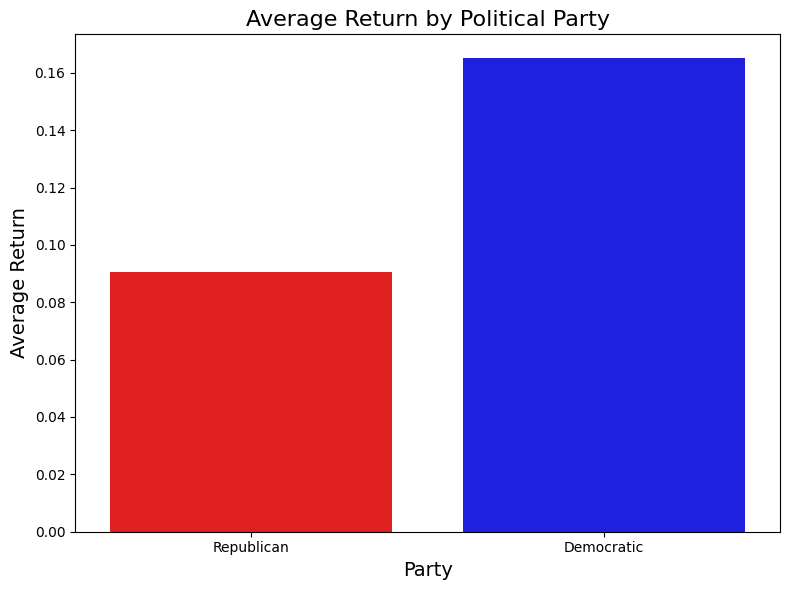

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

party_data = {
    'Party': ['Republican', 'Democratic'],
    'Average Return': [0.090625, 0.165139]
}

df_party = pd.DataFrame(party_data)


plt.figure(figsize=(8, 6))


sns.barplot(data=df_party, x='Party', y='Average Return', palette=['red', 'blue'])

plt.title('Average Return by Political Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Average Return', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:

data = {
    'President': [
        'Bill Clinton',
        'Donald Trump',
        'George Bush',
        'Barack Obama',
        'Joe Biden',
        'Ronald Reagan',
        'George W. Bush'
    ],
    'Party': [
        'Democratic',
        'Republican',
        'Republican',
        'Democratic',
        'Democratic',
        'Republican',
        'Republican'
    ],
    'Average Return': [
        0.158692,
        0.145799,
        0.128656,
        0.124300,
        0.105601,
        0.096829,
        -0.024213
    ]
}

df_corrected = pd.DataFrame(data)

df_corrected

,President,Party,Average Return
0,Bill Clinton,Democratic,0.158692
1,Donald Trump,Republican,0.145799
2,George Bush,Republican,0.128656
3,Barack Obama,Democratic,0.124300
4,Joe Biden,Democratic,0.105601
5,Ronald Reagan,Republican,0.096829
6,George W. Bush,Republican,-0.024213


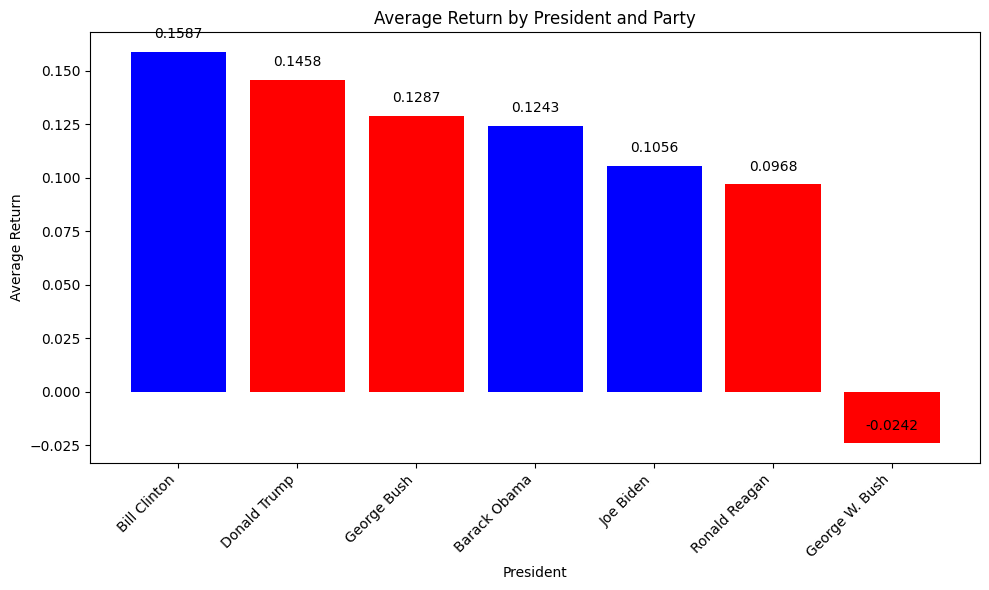

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

colors = ['blue' if party == 'Democratic' else 'red' for party in df_corrected['Party']]
bar_chart = plt.bar(df_corrected['President'], df_corrected['Average Return'], color=colors)

for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom')

plt.title('Average Return by President and Party')
plt.xlabel('President')
plt.ylabel('Average Return')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
!pip install pandas

In [ ]:
tickers=['^GSPC']
sec_data=pd.DataFrame()
for t in tickers:
    sec_data[t]=pdr.get_data_yahoo(t,start='1985-01-20')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
SP500 = yf.download("^GSPC", start="1985-01-20")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
political_periods = {
    "Republican": [("1985-01-20", "1993-01-20"),
                   ("2001-01-20", "2009-01-20"),
                   ("2017-01-20", "2021-01-20")],
    "Democrat": [("1993-01-20", "2001-01-20"),
                 ("2009-01-20", "2017-01-20"),
                 ("2021-01-20", "2024-01-30")]
}

In [ ]:
def calc_returns_for_periods(data, periods):
    returns = {}
    for party, ranges in periods.items():
        party_returns = []
        for start, end in ranges:
            period_data = data[(data.index >= start) & (data.index <= end)]
            if not period_data.empty:
                period_return = (period_data['Adj Close'][-1] / period_data['Adj Close'][0] - 1) * 100
                party_returns.append((start, end, period_return))
        returns[party] = party_returns
    return returns

In [ ]:
returns_by_political_affiliation = calc_returns_for_periods(SP500, political_periods)
returns_by_political_affiliation

{'Republican': [('1985-01-20', '1993-01-20', 147.3149607279704),
  ('2001-01-20', '2009-01-20', -40.03872544015623),
  ('2017-01-20', '2021-01-20', 69.58715447423631)],
 'Democrat': [('1993-01-20', '2001-01-20', 209.79072252094056),
  ('2009-01-20', '2017-01-20', 182.0732397645854),
  ('2021-01-20', '2024-01-30', 27.859861884045433)]}

In [ ]:
for party in returns_by_political_affiliation:
    print(f"{party} Administration Returns:")
    for period in returns_by_political_affiliation[party]:
        print(f"From {period[0]} to {period[1]}: {period[2]:.2f}%")
    print("\n")

Republican Administration Returns:
From 1985-01-20 to 1993-01-20: 147.31%
From 2001-01-20 to 2009-01-20: -40.04%
From 2017-01-20 to 2021-01-20: 69.59%


Democrat Administration Returns:
From 1993-01-20 to 2001-01-20: 209.79%
From 2009-01-20 to 2017-01-20: 182.07%
From 2021-01-20 to 2024-01-30: 27.86%




In [ ]:
returns_by_political_affiliation = calc_returns_for_periods(SP500, political_periods)
returns_by_political_affiliation

{'Republican': [('1985-01-20', '1993-01-20', 147.3149607279704),
  ('2001-01-20', '2009-01-20', -40.03872544015623),
  ('2017-01-20', '2021-01-20', 69.58715447423631)],
 'Democrat': [('1993-01-20', '2001-01-20', 209.79072252094056),
  ('2009-01-20', '2017-01-20', 182.0732397645854),
  ('2021-01-20', '2024-01-30', 27.859861884045433)]}

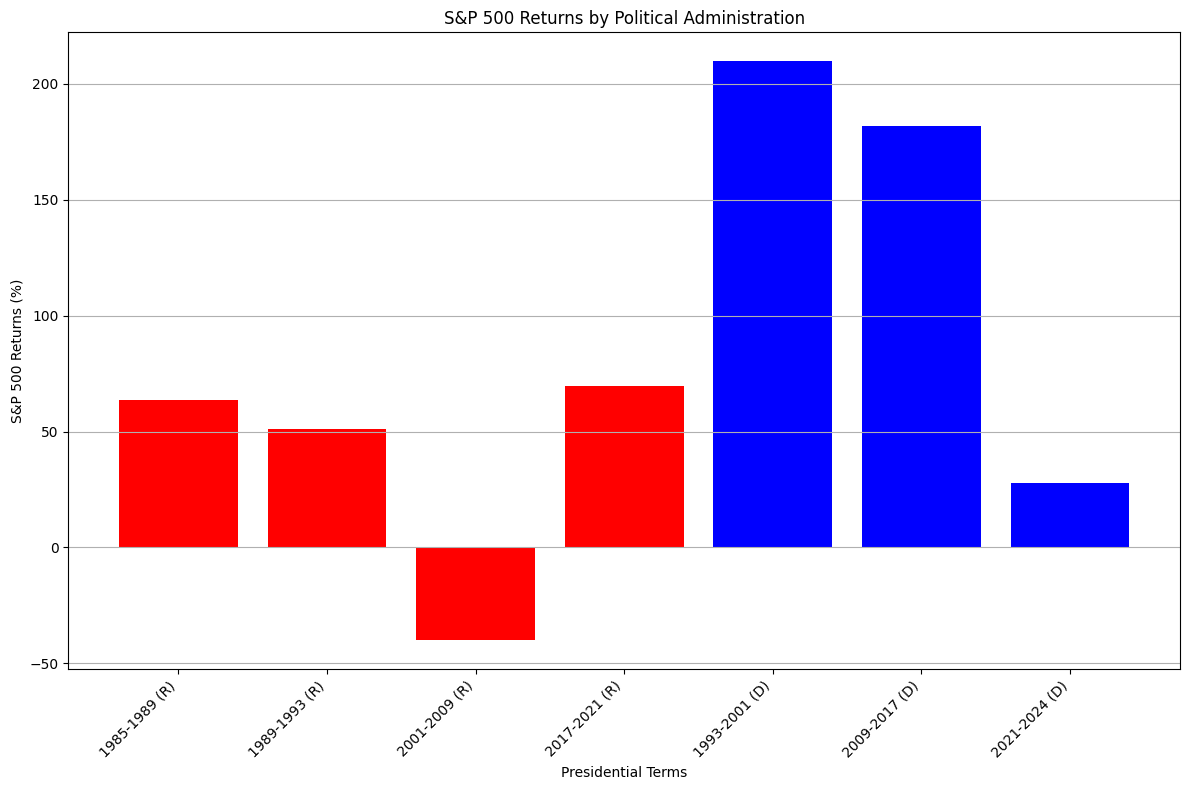

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Period": [
        "1985-1989 (R)", "1989-1993 (R)", "2001-2009 (R)", "2017-2021 (R)",
        "1993-2001 (D)", "2009-2017 (D)", "2021-2024 (D)"
    ],
    "Returns": [
        63.57359577208839, 51.19491600133386, -40.03872544015623, 69.58715447423631,
        209.79072252094056, 182.0732397645854, 27.859861884045433
    ],
    "Affiliation": [
        "Republican", "Republican", "Republican", "Republican",
        "Democrat", "Democrat", "Democrat"
    ]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
colors = df["Affiliation"].map({"Republican": "red", "Democrat": "blue"})
plt.bar(df["Period"], df["Returns"], color=colors)
plt.xlabel("Presidential Terms")
plt.ylabel("S&P 500 Returns (%)")
plt.title("S&P 500 Returns by Political Administration")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

sp500 = yf.download('^GSPC', start='1985-01-20', end='2024-01-20')

sp500['Returns'] = sp500['Adj Close'].pct_change()

print(sp500.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1985-01-21  171.320007  175.449997  171.309998  175.229996  175.229996   
1985-01-22  175.229996  176.630005  175.139999  175.479996  175.479996   
1985-01-23  175.479996  177.300003  175.149994  177.300003  177.300003   
1985-01-24  177.300003  178.160004  176.559998  176.710007  176.710007   
1985-01-25  176.710007  177.750000  176.539993  177.350006  177.350006   

               Volume   Returns  
Date                             
1985-01-21  146800000       NaN  
1985-01-22  174800000  0.001427  
1985-01-23  144400000  0.010372  
1985-01-24  160700000 -0.003328  
1985-01-25  122400000  0.003622  


In [ ]:
presidential_terms = pd.DataFrame({
    'Start': ['1985-01-20', '1989-01-20', '1993-01-20', '2001-01-20','2009-01-20', '2017-01-20', '2021-01-20'],
    'End': ['1989-01-20', '1993-01-20', '2001-01-20', '2009-01-20','2017-01-20', '2021-01-20', '2024-01-20'],
    'Affiliation': ['Republican','Republican', 'Democrat','Republican','Democrat', 'Republican', 'Democrat']
})

In [ ]:
affiliation_returns = pd.DataFrame()

for _, row in presidential_terms.iterrows():
    mask = (sp500.index >= row['Start']) & (sp500.index <= row['End'])
    temp_df = sp500.loc[mask]
    temp_df['Affiliation'] = row['Affiliation']
    affiliation_returns = pd.concat([affiliation_returns, temp_df])

# Example: Filter by affiliation
republican_returns = affiliation_returns[affiliation_returns['Affiliation'] == 'Republican']['Returns']
democrat_returns = affiliation_returns[affiliation_returns['Affiliation'] == 'Democrat']['Returns']

<ipython-input-26-56016951a6f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Affiliation'] = row['Affiliation']
<ipython-input-26-56016951a6f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Affiliation'] = row['Affiliation']
<ipython-input-26-56016951a6f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
sp500 = yf.download("^GSPC", start="1985-01-20")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Define political periods: Adjust these dates based on specific administrations
political_periods = {
    "Republican": [("1985-01-20", "1993-01-20"), ("2001-01-20", "2009-01-20"), ("2017-01-20", "2021-01-20")],
    "Democrat": [("1993-01-20", "2001-01-20"), ("2009-01-20", "2017-01-20"), ("2021-01-20", "2023-04-30")] # Example, adjust accordingly
}

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(republican_returns.dropna(), democrat_returns.dropna())

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.2244596269089507, P-value: 0.22080823090502372


In [ ]:
import pandas as pd     # Start of Ryan's code machine learning stock prediction model during Joe Biden Presidency
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
x = []; y = []
df = pd.read_csv('/content/gspc_data_train.csv')
x, y = df['day'], df['closing price']
x = np.array(x)
y = np.array(y)

In [ ]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression() # create the model
model.fit(x, y) # fit the data
y_lin_pred = model.predict(x) # predicted values at the x-coords

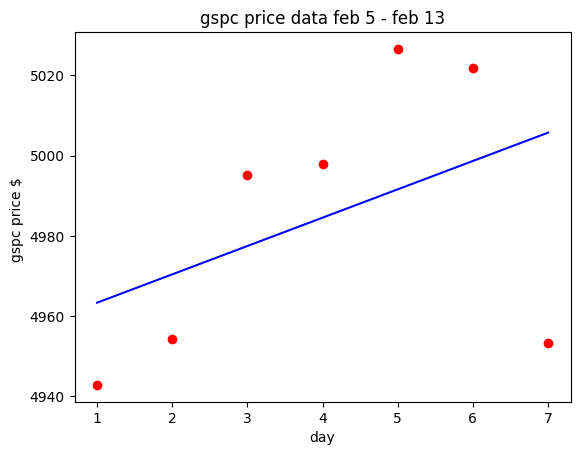

In [ ]:
m = model.coef_[0][0]
b = model.intercept_[0]
lr = lambda x: m*x + b

plt.plot(x,y,'ro')
plt.plot(x,lr(x),'b-')
plt.xlabel('day')
plt.ylabel('gspc price $ ')
plt.title('gspc price data feb 5 - feb 13')
plt.show()
# linear regression on training gspc data points

In [ ]:
xt = []; yt = []
df2 = pd.read_csv('/content/gspc_data_test.csv')
xt, yt = df2['day'], df2['closing price']
xt = np.array(xt)
yt = np.array(yt)
xt = xt[:,np.newaxis]
yt = yt[:,np.newaxis]

x2 = np.concatenate((x,xt), axis=0) # concat x and xt along rows (axis=0)

In [ ]:
# polynomial features object
polynomial_features = PolynomialFeatures(degree=8)
x_poly = polynomial_features.fit_transform(x)

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

nsz = len(model.coef_[0])
theta = [model.intercept_[0]]
theta2 = [model.coef_[0][i] for i in range(1, nsz)]
theta += theta2
lrp = lambda x: np.sum(np.array([theta[i]*(x**i) for i in range(len(theta))]), axis=0)

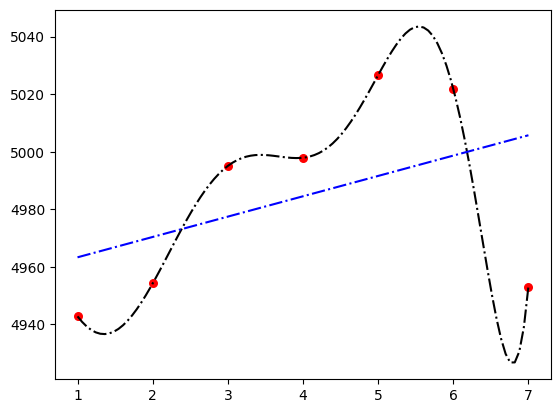

In [ ]:
delt = 0
xv = np.linspace(np.min(x)-delt, np.max(x)+delt, 100)
plt.scatter(x, y, s=30, c='r')
plt.plot(xv, lrp(xv), 'k-.') # plot poly regression
plt.plot(xv, lr(xv),'b-.') # plot linear regression
plt.show() #polynomial and linear regression for training data

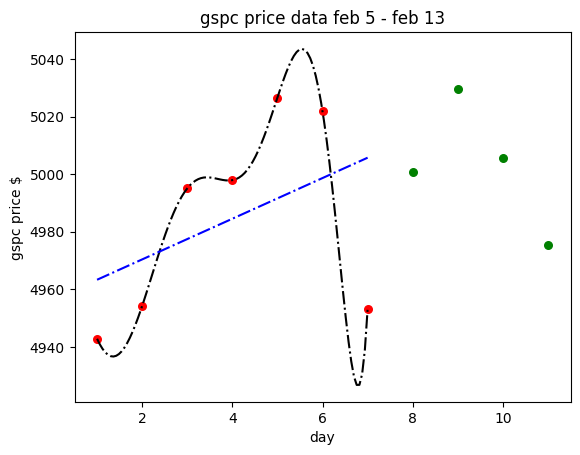

In [ ]:
plt.scatter(x, y, s=30, c='r')
plt.plot(xv, lrp(xv), 'k-.')  # plot poly regression
plt.plot(xv, lr(xv), 'b-.')  # plot linear regression

# Add the points from gspc_data_test.csv to the plot
plt.scatter(xt, yt, s=30, c='g')  # Green points for test data

plt.xlabel('day')
plt.ylabel('gspc price $')
plt.title('gspc price data feb 5 - feb 13')

plt.show() # adding testing data to graph

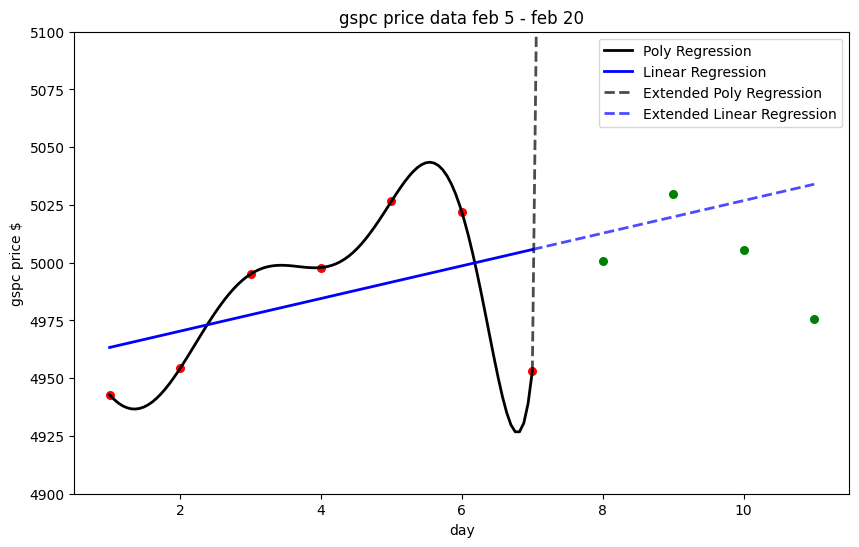

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, c='r')
plt.plot(xv, lrp(xv), 'k-', label='Poly Regression', linewidth=2)  # Solid line for poly regression
plt.plot(xv, lr(xv), 'b-', label='Linear Regression', linewidth=2)  # Solid line for linear regression


plt.scatter(xt, yt, s=30, c='g')  # Green points for test data

# Extend the polynomial regression line starting from day 7 using model.predict
extended_x = np.arange(7, xv.max() + 5, 1).reshape(-1, 1)  # Assuming a step size of 1

# Generate polynomial features for the extended range
degree = 8
extended_x_poly = np.column_stack([extended_x ** i for i in range(1, degree + 1)])

# Add a column of ones for the constant term
extended_x_poly = np.column_stack([np.ones_like(extended_x_poly[:, 0]), extended_x_poly])

# Predict using the linear regression model
extended_y_poly = model.predict(extended_x_poly)

# Plot the extended part of the polynomial and linear regression lines with different styles
plt.plot(extended_x, extended_y_poly, 'k--', alpha=0.7, label='Extended Poly Regression', linewidth=2)  # Dashed line for extension
plt.plot(extended_x, lr(extended_x), 'b--', alpha=0.7, label='Extended Linear Regression', linewidth=2)  # Dashed line for extension

# Set y-axis limits
plt.ylim(4900, 5100)

plt.xlabel('day')
plt.ylabel('gspc price $')
plt.title('gspc price data feb 5 - feb 20')
plt.legend()  # Add legend to distinguish between different lines

plt.show() # linear regression model is more accurate in this instance

In [ ]:
#Machine learning algorithm of Random Forrest Classifier


In [ ]:
df=mldata

<Axes: xlabel='Date'>

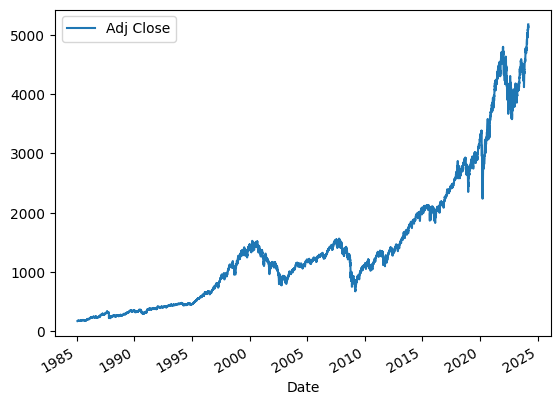

In [ ]:
df.plot.line(y='Adj Close',use_index=True)

In [ ]:
#Setting Target for Machine Learning
df['tomorrow']=df['Adj Close'].shift(-1)
df['target']=(df['tomorrow']>df['Adj Close']).astype(int)

In [ ]:
#Training a Model
from sklearn.ensemble import RandomForestClassifier
#Training a bunch of induvidual trees with randomised parameters and averaging the results from those decision trees
#Resistant to overfit than other models
#can pickup non-linear tendencies

In [ ]:
model=RandomForestClassifier(n_estimators=50,min_samples_split=100,random_state=1)

train = df.iloc[:-200]
test=df.iloc[-500:]

predictors=['Adj Close','Volume','Open','High','Low']
model.fit(train[predictors],train['target'])

RandomForestClassifier(min_samples_split=100, n_estimators=50, random_state=1)

In [ ]:
preds=model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)

In [ ]:
precision_score(test['target'],preds)

0.6680672268907563

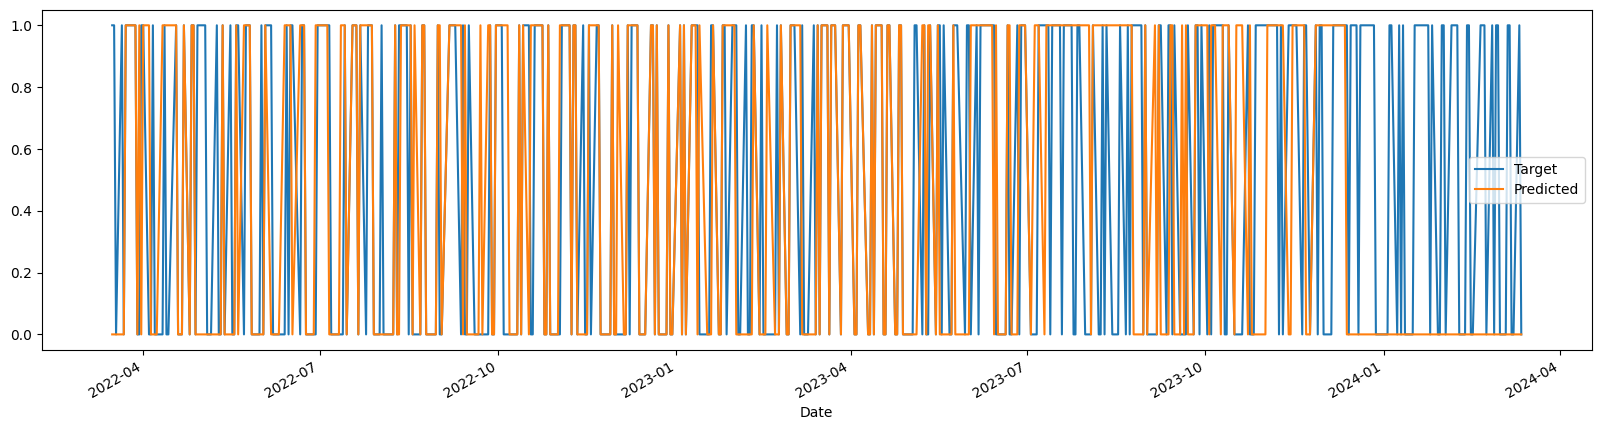

In [ ]:
import matplotlib.pyplot as plt
combined=pd.concat([test['target'],preds],axis=1)
combined.plot(figsize=[20,5])
plt.legend(["Target", "Predicted"])

In [ ]:
predictors
iterations=5000

In [ ]:
AdjPrice_mean=df['Adj Close'].mean()
Volume_mean=df['Volume'].mean()
Open_mean=df['Open'].mean()
High_mean=df['High'].mean()
Low_mean=df['Low'].mean()

In [ ]:
AdjPrice_std=df['Adj Close'].std()
Volume_std=df['Volume'].std()
Open_std=df['Open'].std()
High_std=df['High'].std()
Low_std=df['Low'].std()

In [ ]:
AdjClose=np.random.normal(AdjPrice_mean,AdjPrice_std,iterations)
Volume=np.random.normal(Volume_mean,Volume_std,iterations)
Open=np.random.normal(Open_mean,Open_std,iterations)
High=np.random.normal(High_mean,High_std,iterations)
Low=np.random.normal(Low_mean,Low_std,iterations)

In [ ]:
a=pd.DataFrame({'Adj Close':AdjClose,'Volume':Volume,'Open':Open,'High':High,'Low':Low})

In [ ]:
p=model.predict(a)
p=list(p)

In [ ]:
import scipy.stats as sst

In [ ]:
p.count(0)/(p.count(0)+p.count(1))

0.3292

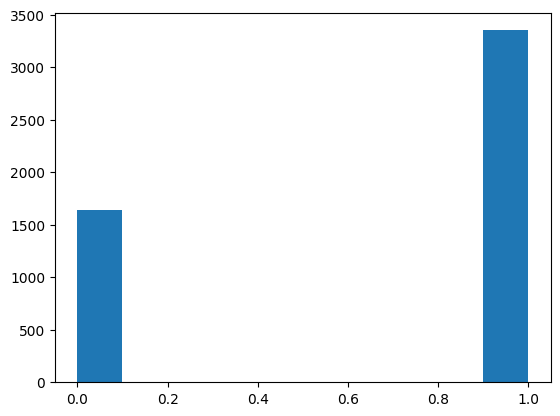

In [ ]:
plt.hist(p,bins=10)
plt.show()

In [ ]:
hist=np.histogram(p,bins=2)

In [ ]:
hist_dist=sst.rv_histogram(hist)

In [ ]:
from scipy.stats import describe

In [ ]:
summary = describe(p)
prob_1 = summary.mean

In [ ]:
prob_1

0.6708